# Exploratory Data Analysis

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import folium



In [3]:
df = pd.read_csv('data/clean_listing.csv')
df.head()

Unnamed: 0  index  host_since host_response_rate neighbourhood_cleansed  \
0           0      1  2011-01-29                90%               Tampines   
1           1      2  2011-01-29                90%               Tampines   
2           2      3  2011-11-24               100%            Bukit Merah   
3           3      4  2011-11-24               100%            Bukit Merah   
4           4      5  2011-01-29                90%               Tampines   

  neighbourhood_group_cleansed  latitude  longitude property_type  \
0                  East Region   1.34754  103.95958         House   
1                  East Region   1.34531  103.96100         House   
2               Central Region   1.29015  103.80814     Apartment   
3               Central Region   1.28836  103.81144     Apartment   
4                  East Region   1.34490  103.95979         House   

      room_type  ...  Dryer  Self check-in  Cooking basics  Host greets you  \
0  Private room  ...   True           True            True            False   
1  Private room  ...   True           True            True            False   
2  Private room  ...   True           True           False            False   
3  Private room  ...   True           True           False            False   
4  Private room  ...   True           True            True            False   

   TV with standard cable  distance_from_MRT  distance_from_Bus  \
0                   False           0.842953           0.180102   
1                   False           0.880282           0.205346   
2                   False           0.549557           0.117975   
3                   False           0.609339           0.040906   
4                   False           0.738518           0.210803   

   distance_from_Mall  distance_from_School  distance_from_Food  
0            7.976199              3.515767            0.785094  
1            7.952045              3.786036            0.502588  
2            4.230675              1.095807            0.169376  
3            3.862544              0.685090            0.208523  
4            7.816646              3.809634            0.506811  

[5 rows x 81 columns]

### Airbnb Visualization

In [66]:
from folium.plugins import FastMarkerCluster

locations = list(zip(df.latitude, df.longitude))

map1 = folium.Map(location=[df.iloc[0]['latitude'],df.iloc[0]['longitude']],  zoom_start=9, tiles="OpenStreetMap")
FastMarkerCluster(data=locations).add_to(map1)


map1

### From the visualization above, we can see that predicting the price based specific location might not give the accurate results as the data is limited

In [63]:
map = folium.Map(location=[df.iloc[0]['latitude'],df.iloc[0]['longitude']], 
                 zoom_start=14, control_scale=True)

#Loop through each row in the dataframe
for i,row in df.iterrows():
    #Setup the content of the popup
    iframe = folium.IFrame('Price:' + str(row["price"]))
    
    #Initialise the popup using the iframe
    popup = folium.Popup(iframe, min_width=80, max_width=80)
    
    #Add each row to the map
    folium.Marker(location=[row['latitude'],row['longitude']],
                  popup = popup).add_to(map)

In [67]:
import json
folium.Choropleth(
             geo_data = 'data/neighbourhoods.geojson',
             data=df, # my dataset
             columns=['neighbourhood_cleansed', 'price'], # zip code is here for matching the geojson zipcode, sales price is the column that changes the color of zipcode areas
             key_on='feature.properties.neighbourhood', # this path contains zipcodes in str type, this zipcodes should match with our ZIP CODE column
             fill_color='BuPu', fill_opacity=0.7, line_opacity=0.2,
             legend_name='SALE PRICE').add_to(map1)
map1

### Price Heatmap

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


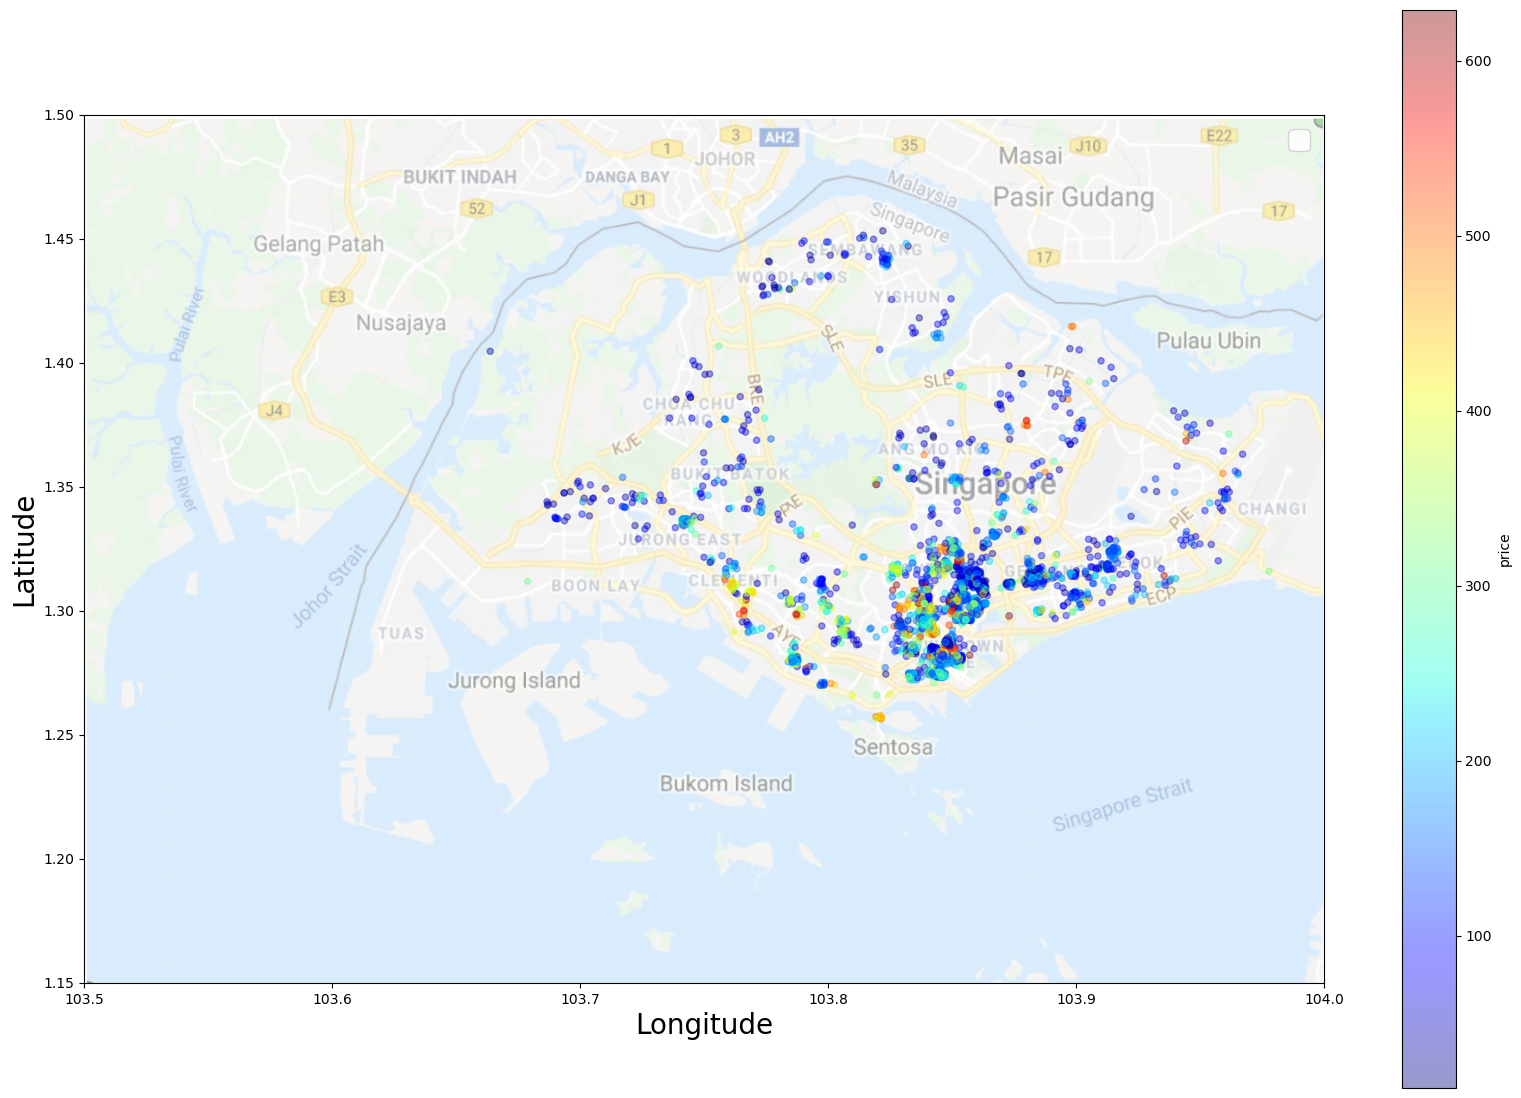

In [70]:
import matplotlib.image as mpimg
# import our image 
singapore_img = mpimg.imread('Singapore_map.png')
# plot the data
ax = df.plot(
    kind="scatter", 
    x="longitude", 
    y="latitude", 
    figsize=(20,14),
    c="price", 
    cmap=plt.get_cmap("jet"),
    colorbar=True, 
    alpha=0.4,
)
# use our map with it's bounding coordinates
plt.imshow(singapore_img, extent=[103.5,104,1.15, 1.50], alpha=0.5)            
# add axis labels
plt.ylabel("Latitude", fontsize=20)
plt.xlabel("Longitude", fontsize=20)
# set the min/max axis values - these must be the same as above
plt.ylim(1.15, 1.50)
plt.xlim(103.5, 104)
plt.legend(fontsize=20)
plt.show()

### By observing the graphs alone, predicting the price based on specific locations might be difficult as there are limited data. If we predict the price using specific regions might not be able to produce effective result as based on the heat map, we cannot really find any relationship. One way to optimize the data might be the use of k means algorithm

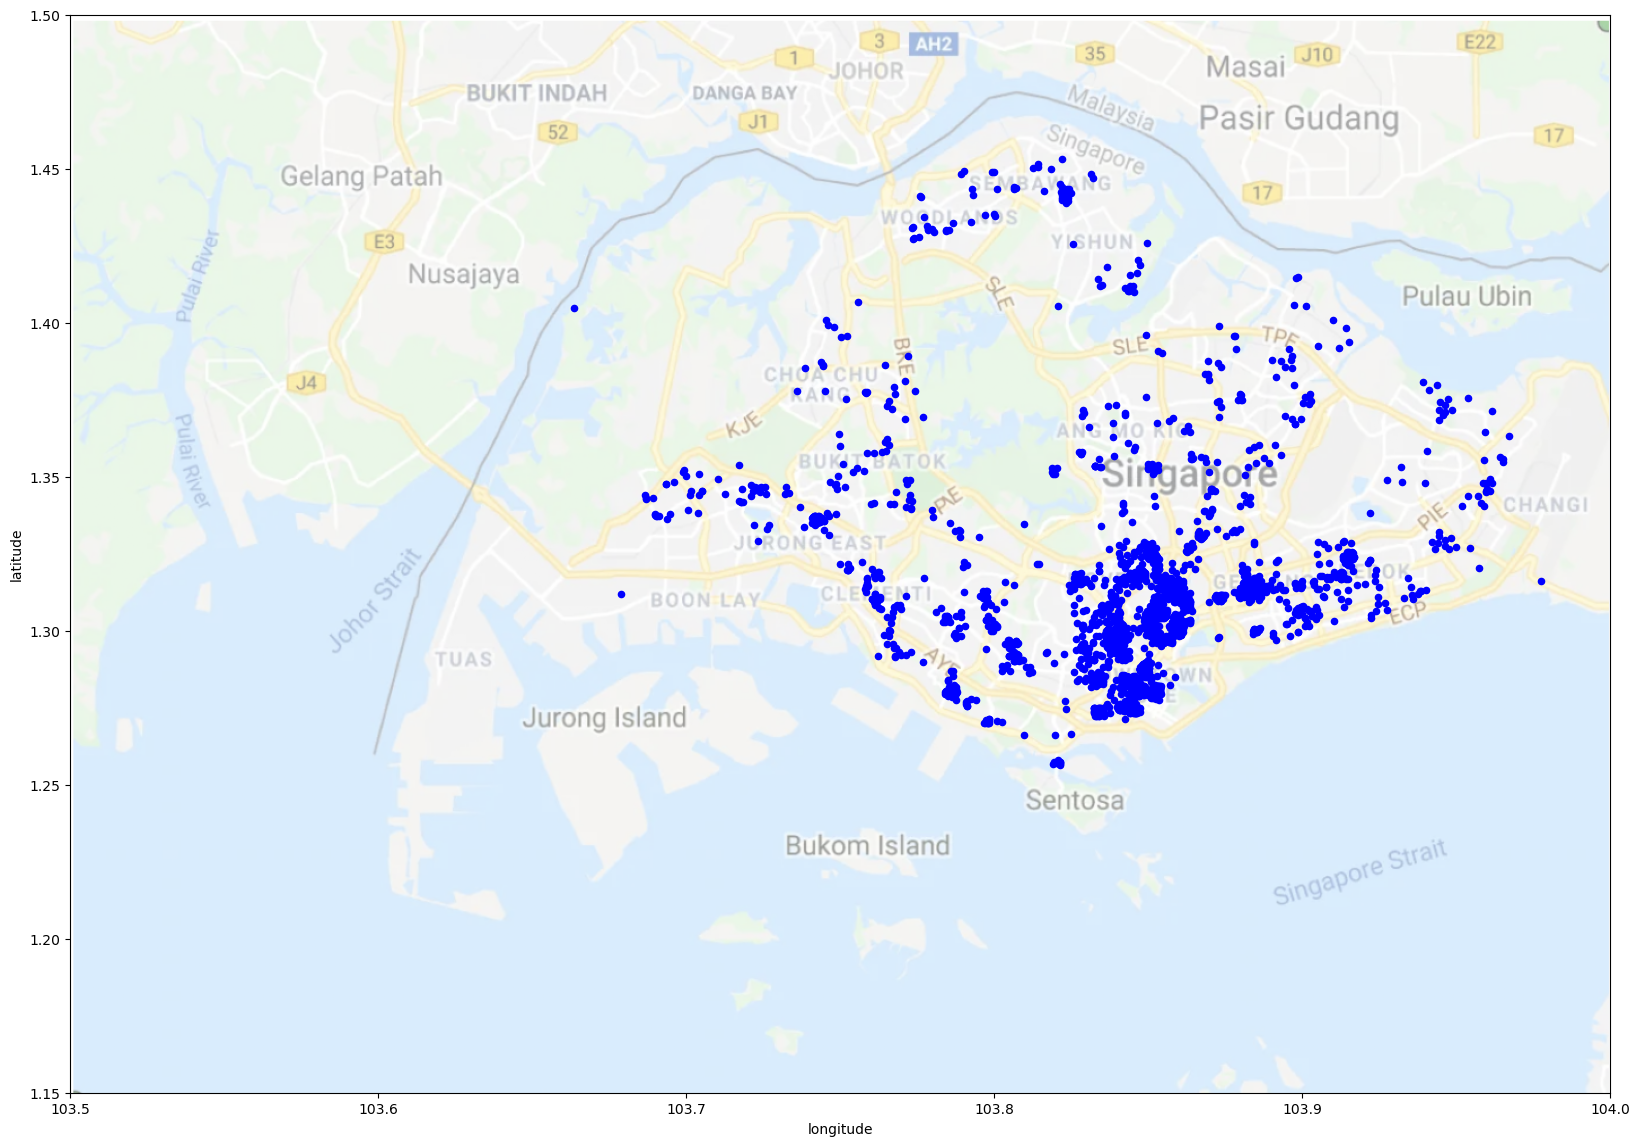

In [74]:
singapore_img = mpimg.imread('Singapore_map.png')

ShowMap = df.plot(
    kind="scatter", 
    x="longitude", 
    y="latitude", 
    figsize=(20,14),
    c="blue"
)
plt.imshow(singapore_img, extent=[103.5,104,1.15, 1.50], alpha=0.5)   

In [75]:
"""from sklearn.cluster import KMeans
from KMeansAlgorithm import KMeansAlgorithm

kmeans = KMeansAlgorithm(df, 4) # setting K=4
kmeans.fit_model(100) # 100 iterations
kmeans.plot_kmeans() 
results, centroids = kmeans.predict()
kmeans.plot_elbow()

print(results)
print()
print(centroids)"""

[[103.84242014   1.31898994]
 [103.78163783   1.30719777]
 [103.95148293   1.3499988 ]
 [103.83638156   1.29440511]
 [103.75786365   1.37756672]
 [103.88039177   1.31664089]
 [103.8420482    1.41137899]
 [103.91115633   1.31571657]
 [103.75024042   1.33493067]
 [103.88903565   1.37955702]
 [103.8576603    1.30676406]
 [103.84477268   1.28071635]
 [103.84680094   1.35602652]
 [103.70562542   1.34409333]
 [103.8039787    1.43987852]
 [103.79450752   1.28355749]]


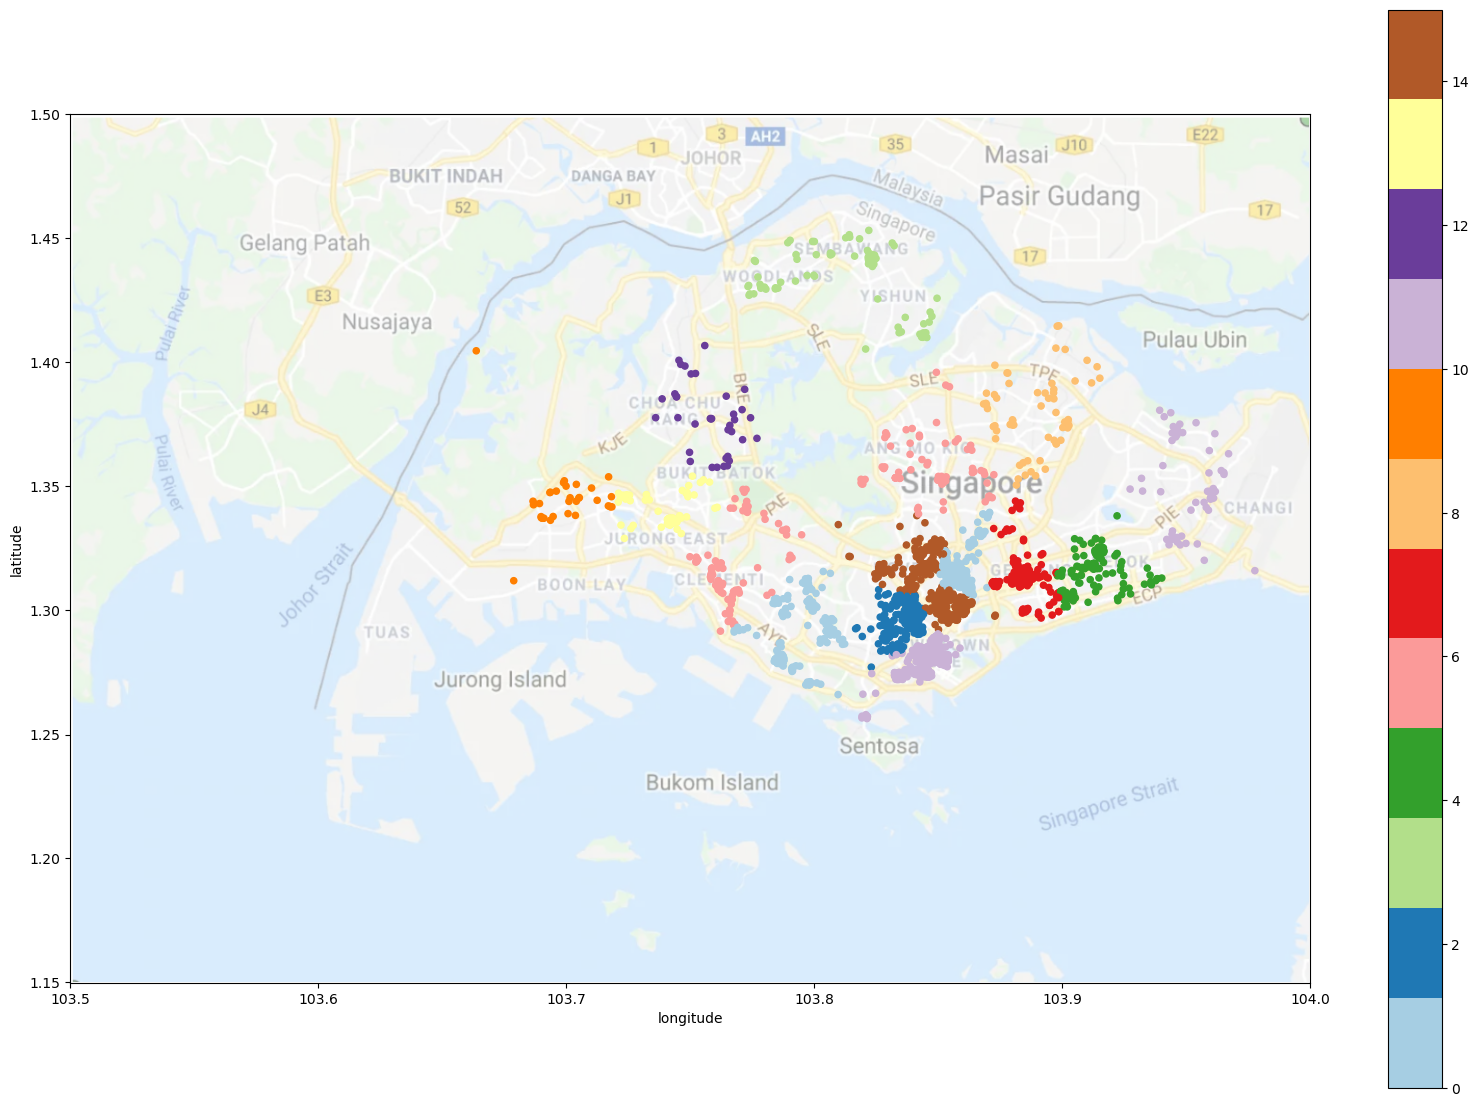

In [77]:
"""ShowMap = df.plot(
    kind="scatter", 
    x="longitude", 
    y="latitude", 
    figsize=(20,14),
    c=y_km,
    cmap = "Paired"
)
plt.imshow(singapore_img, extent=[103.5,104,1.15, 1.50], alpha=0.5)  """

### Show the Coefficient Matrix

In [4]:
df_showHalfFeatures= df.iloc[:,2:18]
df_showAmmenities = df.iloc[:,19:71]
df_showAmmenities['price'] = df['price']
df_locationFeatures = df.iloc[:,72:119]
df_locationFeatures['price'] = df['price']
df_remainingFeatures = df.iloc[:,120:]
df_remainingFeatures['price'] = df['price']

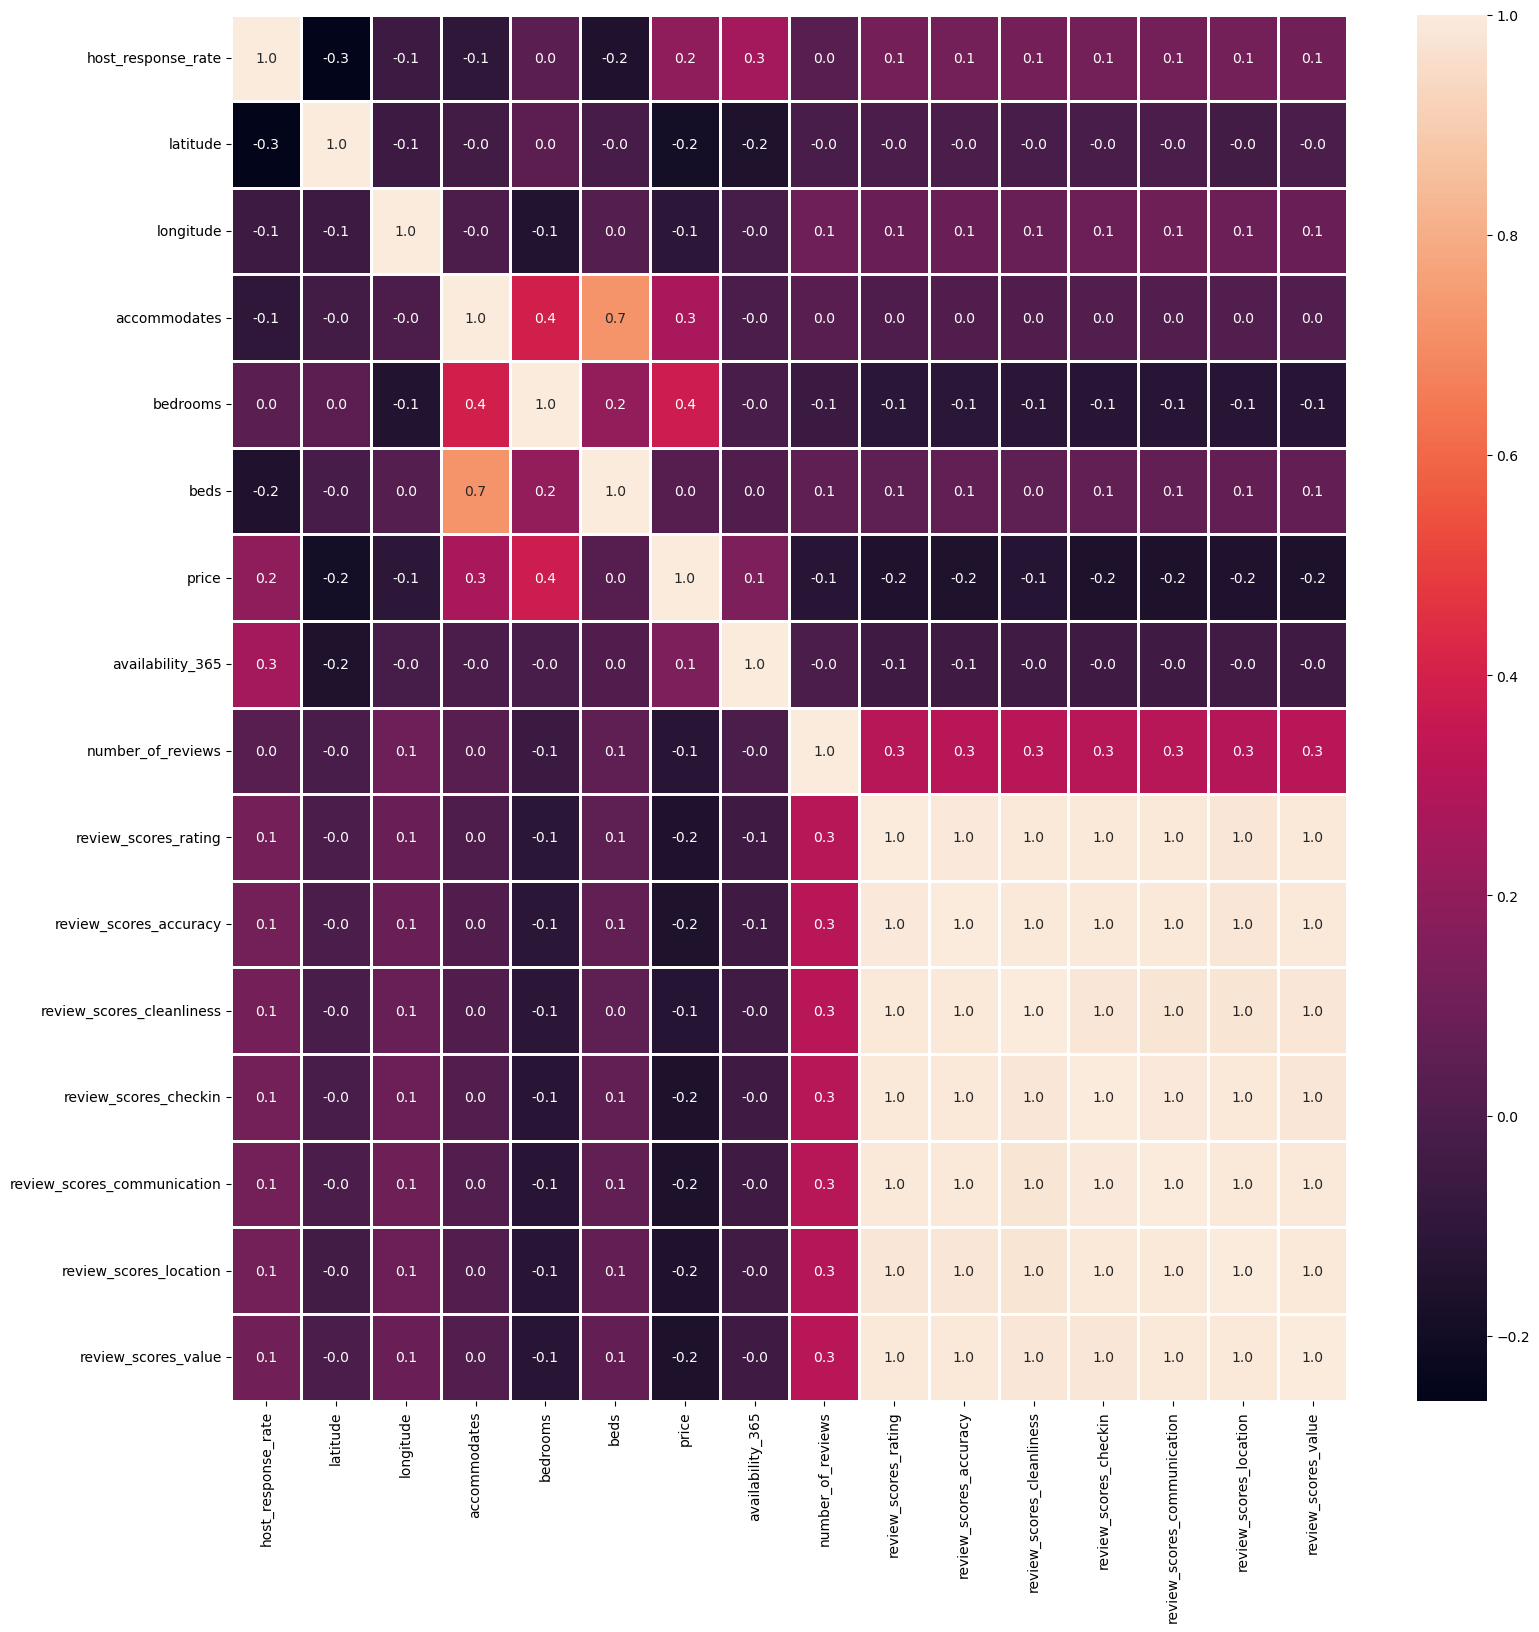

In [5]:
f,ax=plt.subplots(figsize=(18,18))
sns.heatmap(df_showHalfFeatures.corr(),annot=True,linewidths=1,fmt='.1f',ax=ax)
plt.show()

### Based on the correlation map, we can see that bedrooms and the host_response_rate, might help the model to price the sales. 

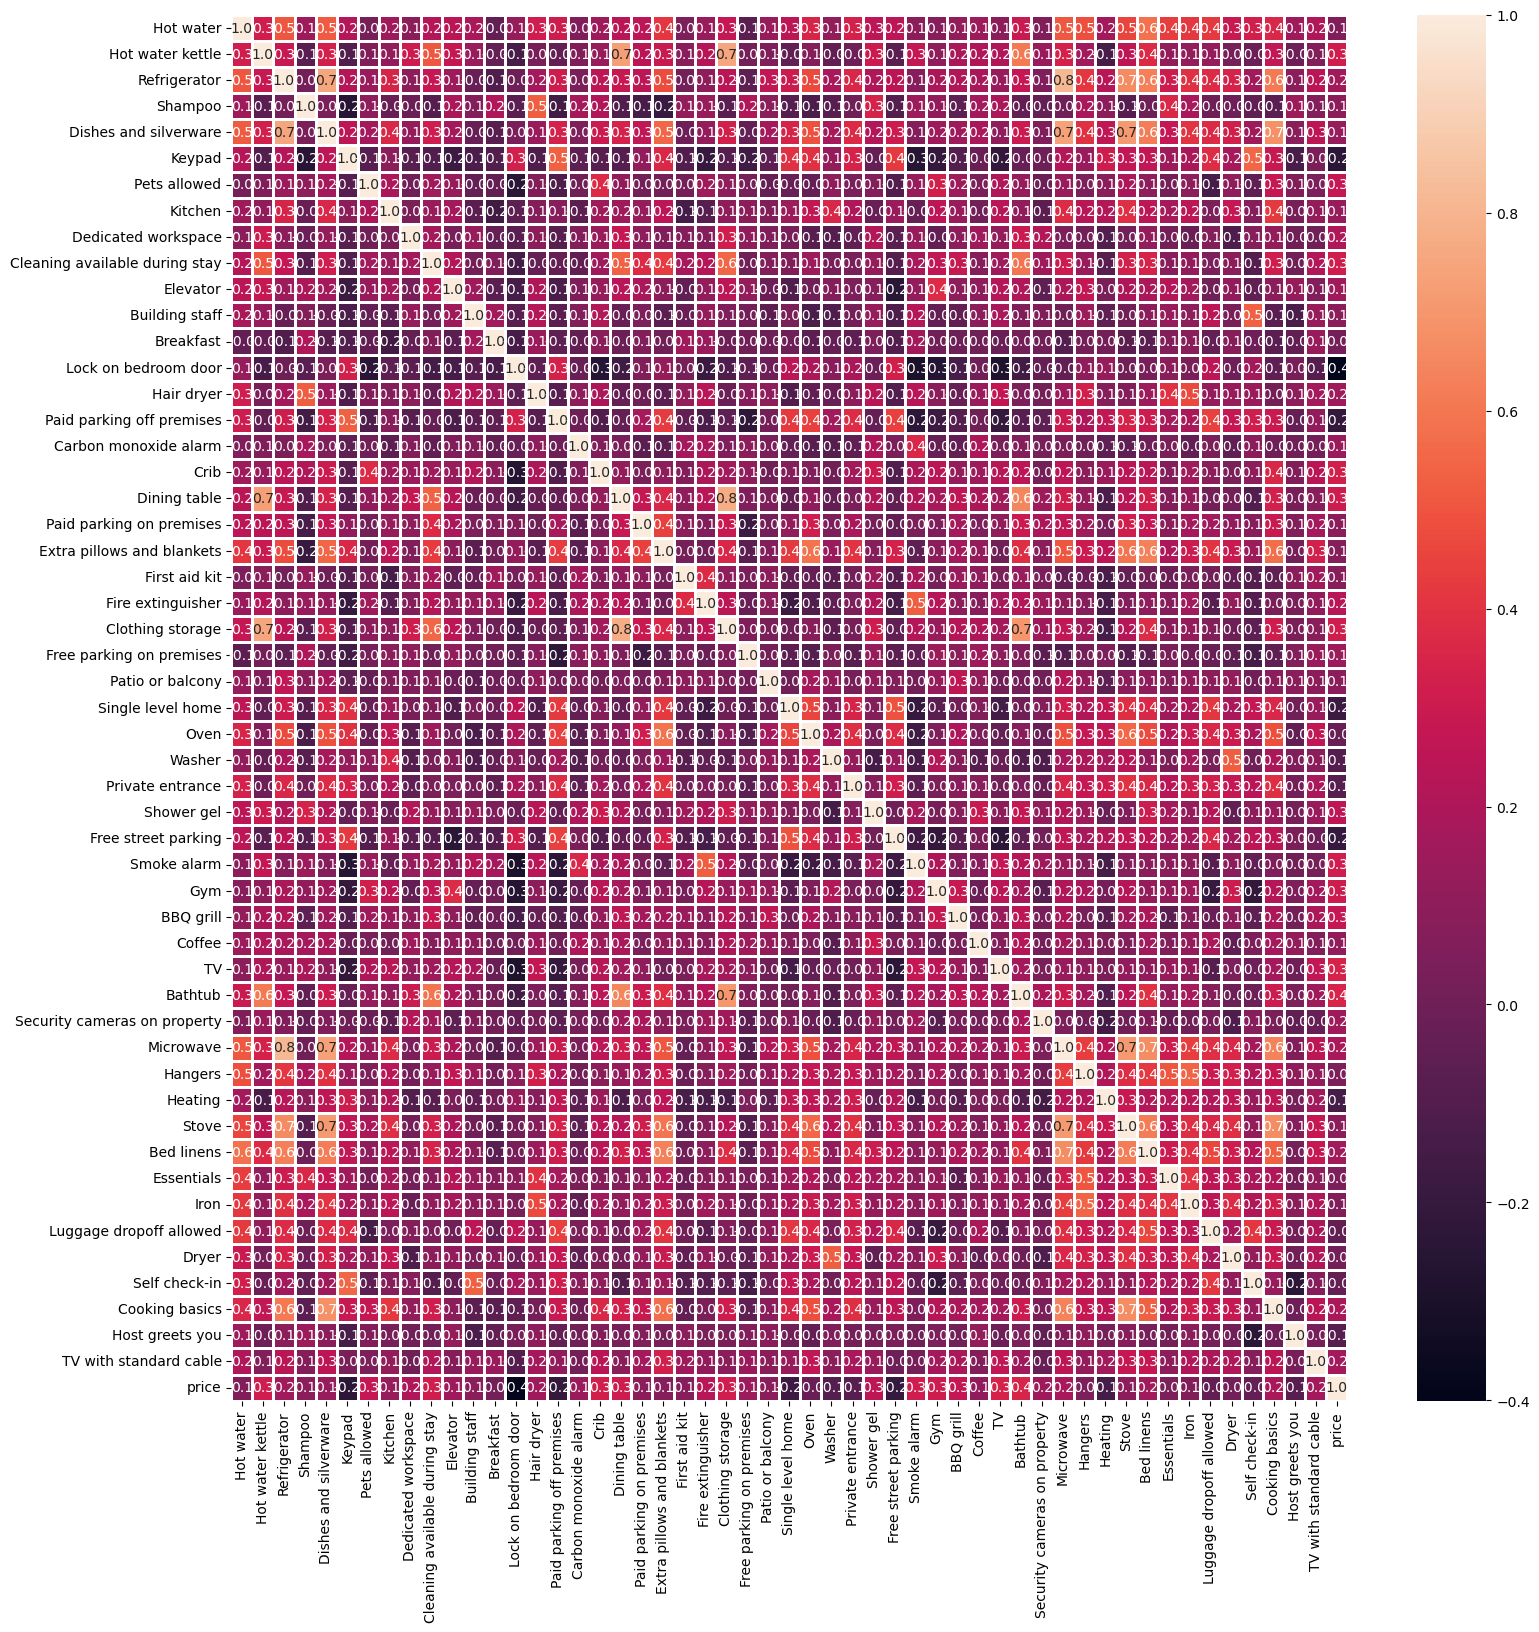

In [6]:
f,ax=plt.subplots(figsize=(18,18))
sns.heatmap(df_showAmmenities.corr(),annot=True,linewidths=1,fmt='.1f',ax=ax)
plt.show() 

### Based on this correlation map, The different kinds of ammenities that the owners provide, might be one factor that will affect the sales price

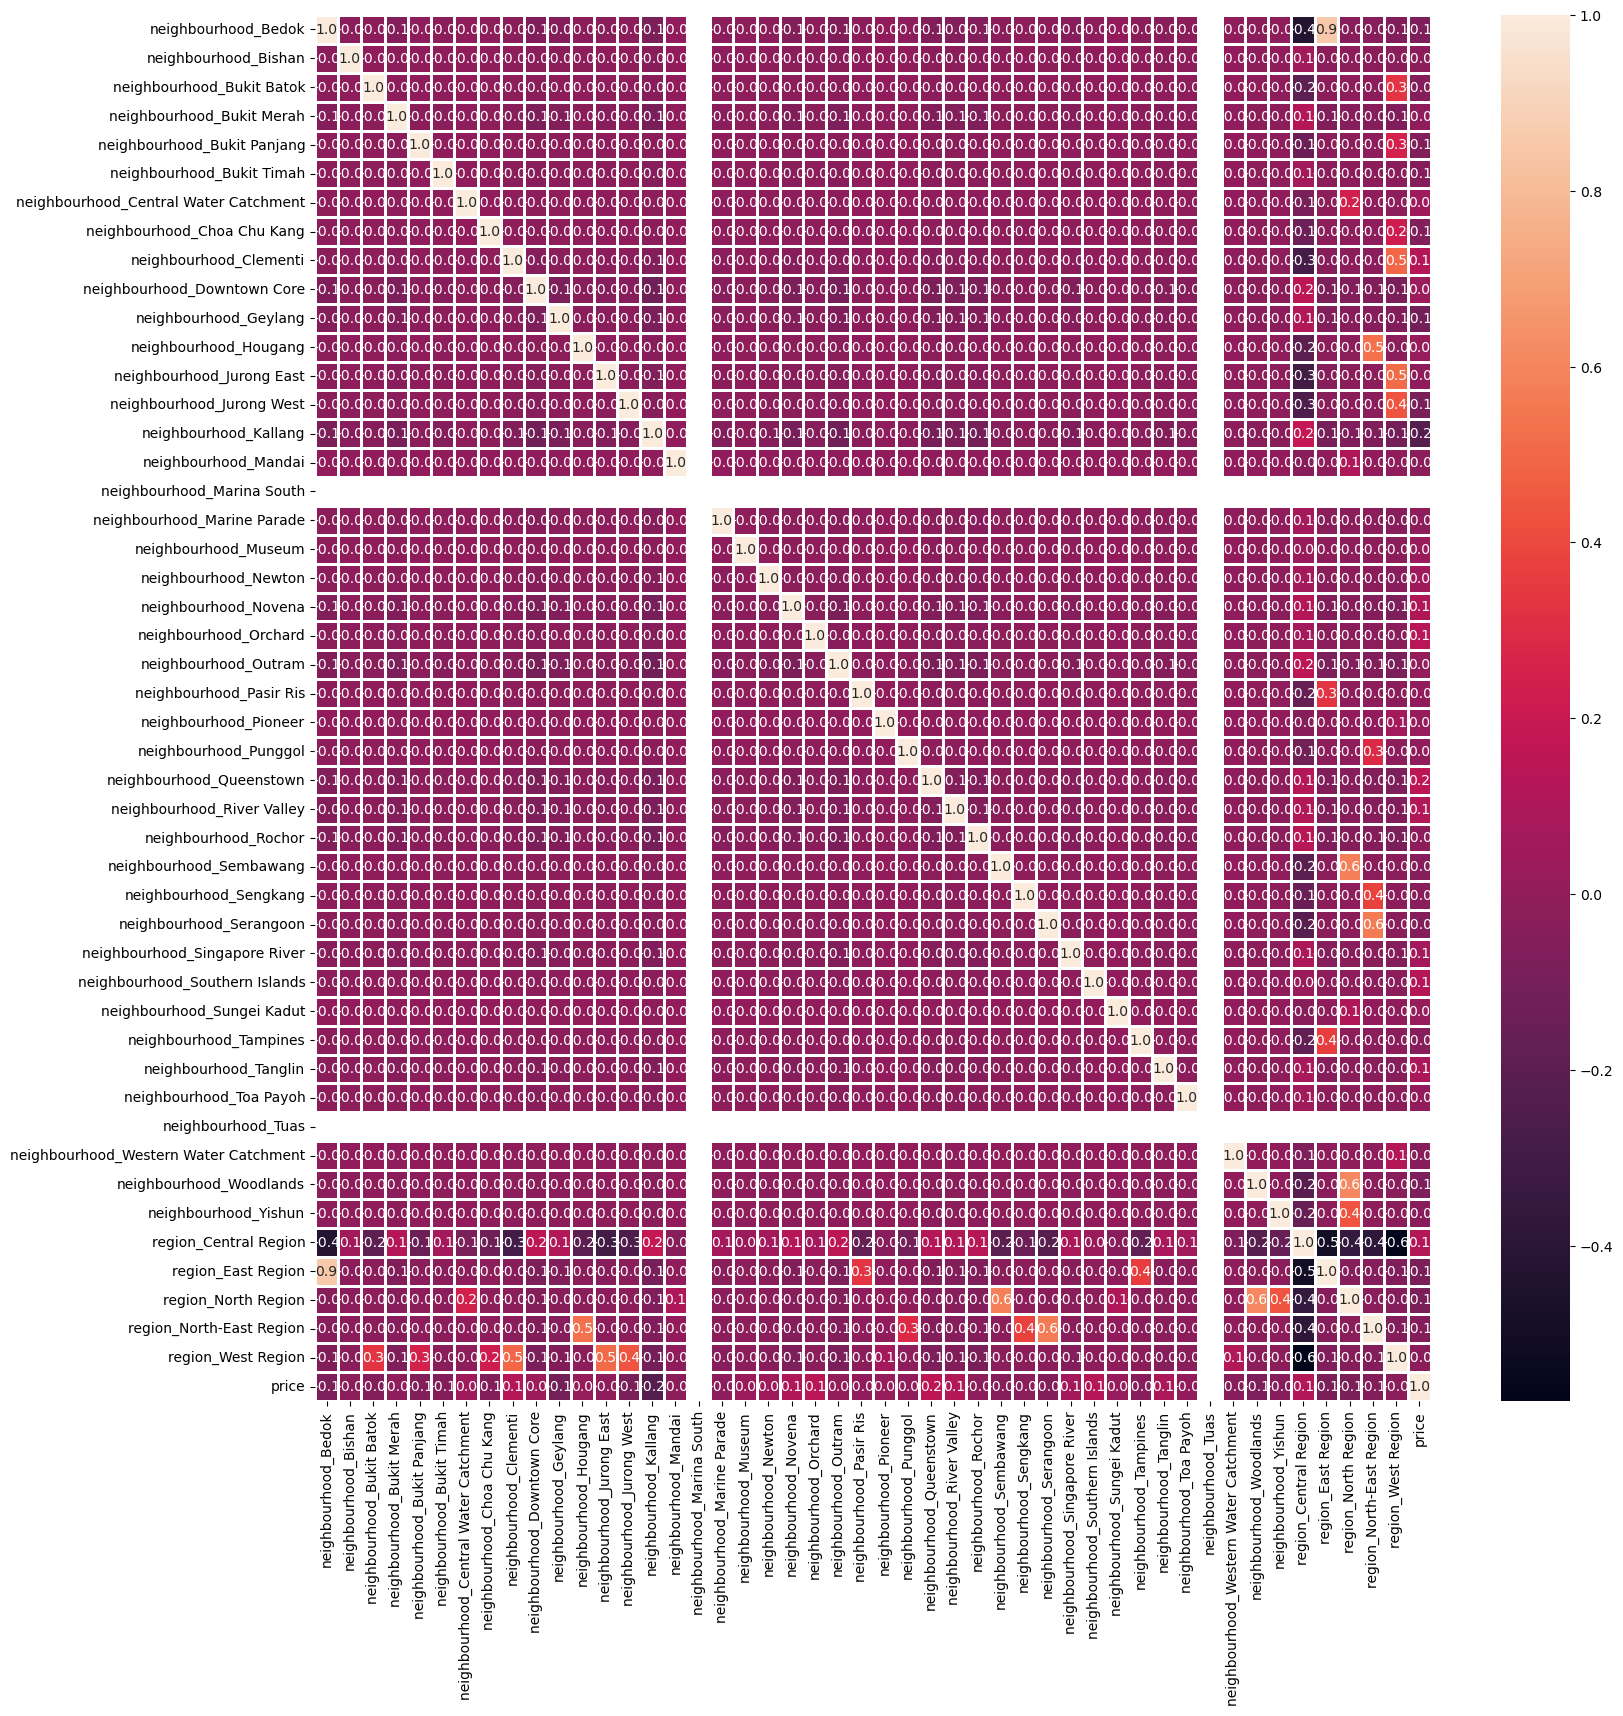

In [ ]:
f,ax=plt.subplots(figsize=(18,18))
sns.heatmap(df_locationFeatures.corr(),annot=True,linewidths=1,fmt='.1f',ax=ax)
plt.show()

### Based on this correlation map, we can see that the locations of these airbnb might not be factor that cause the sale price of the room to be high/low. 

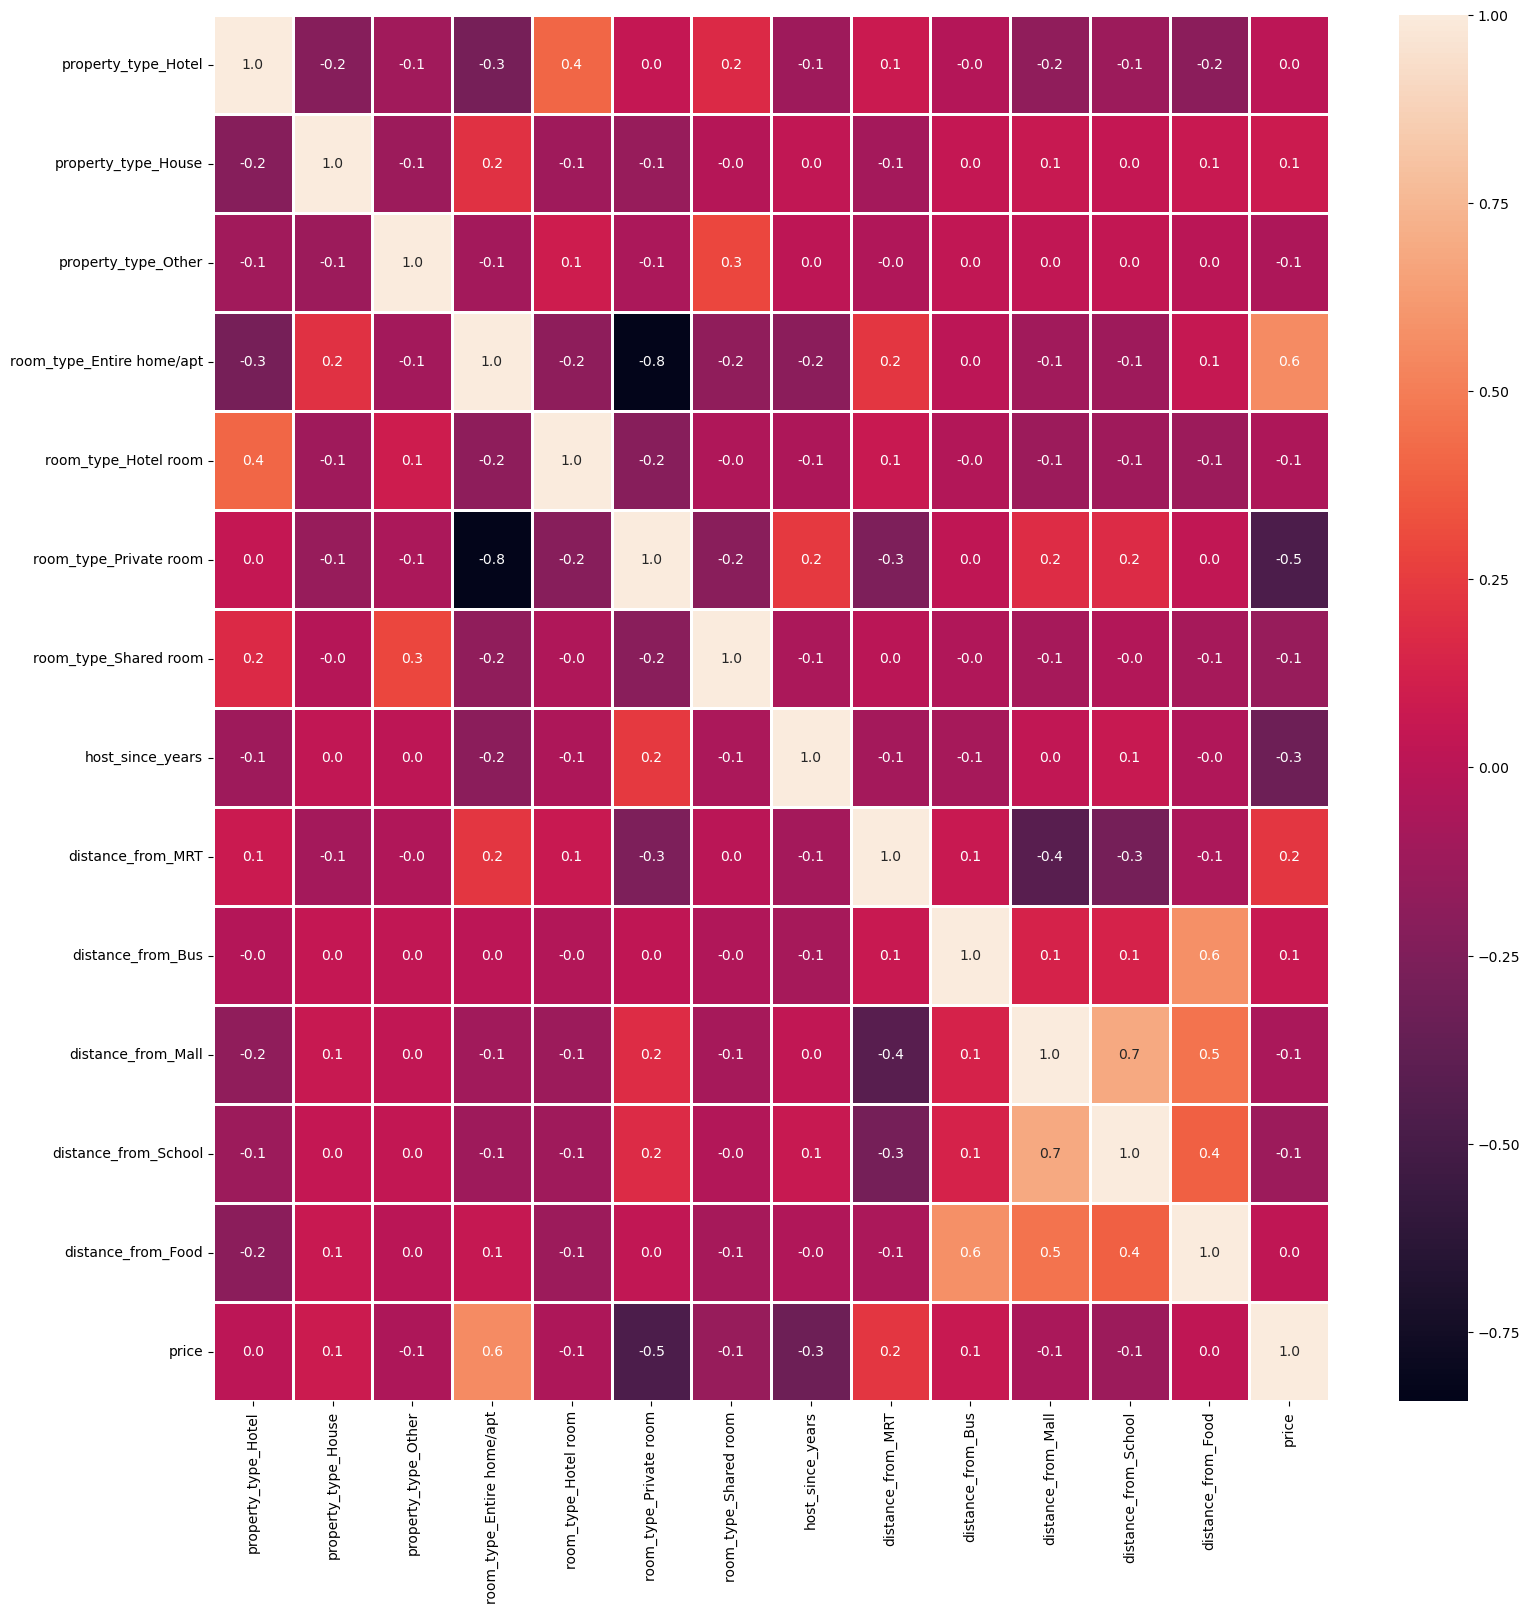

In [ ]:
f,ax=plt.subplots(figsize=(18,18))
sns.heatmap(df_remainingFeatures.corr(),annot=True,linewidths=1,fmt='.1f',ax=ax)
plt.show()

### Based on the correlation map, we can see that the Room_type might be able to predict the sale price as there is negative correlation for private room and positive correlation for Entire home/apt. 

### Move the dependent variable to the first column

In [3]:
column_to_move = df.pop("price")
df.insert(0, "price", column_to_move)

### Replace all True Values to 1 and False Values to 0 for prediction

In [4]:
df.replace({False: 0, True: 1}, inplace=True)

In [5]:
df.head()

price  Unnamed: 0  index  host_response_rate  latitude  longitude  \
0   81.0           0      1                 0.9   1.34754  103.95958   
1   81.0           1      2                 0.9   1.34531  103.96100   
2   52.0           2      3                 1.0   1.29015  103.80814   
3   49.0           3      4                 1.0   1.28836  103.81144   
4  175.0           4      5                 0.9   1.34490  103.95979   

   accommodates  bedrooms  beds  availability_365  ...  \
0             1       1.0   1.0               242  ...   
1             2       1.0   2.0               305  ...   
2             1       1.0   1.0               273  ...   
3             1       1.0   1.0               281  ...   
4             4       3.0   5.0               242  ...   

   room_type_Entire home/apt  room_type_Hotel room  room_type_Private room  \
0                          0                     0                       1   
1                          0                     0                       1   
2                          0                     0                       1   
3                          0                     0                       1   
4                          0                     0                       1   

   room_type_Shared room  host_since_years  distance_from_MRT  \
0                      0                12           0.842953   
1                      0                12           0.880282   
2                      0                12           0.549557   
3                      0                12           0.609339   
4                      0                12           0.738518   

   distance_from_Bus  distance_from_Mall  distance_from_School  \
0           0.180102            7.976199              3.515767   
1           0.205346            7.952045              3.786036   
2           0.117975            4.230675              1.095807   
3           0.040906            3.862544              0.685090   
4           0.210803            7.816646              3.809634   

   distance_from_Food  
0            0.785094  
1            0.502588  
2            0.169376  
3            0.208523  
4            0.506811  

[5 rows x 133 columns]

In [ ]:
#d1= df[['host_response_rate','bedrooms','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']]
#d3 = df[['room_type_Entire home/apt','room_type_Hotel room','room_type_Private room','room_type_Shared room','distance_from_MRT']]
#result = pd.concat([d1, df_showAmmenities,d3], axis=1, join='inner')
#pd.set_option('display.max_columns',None)
#X.head()